# Building Hamiltonians from constructed operators
We are interested in understanding how to construct operators as matrices in order to create Hamiltonians for different types of systems.

## Objectives
1. Understand differences in encoding operators in both the position and energy basis.
2. Understand how to construct Hamiltonians.

### I. Operators in the Position Basis
###### Eigenvectors represent probability to be found in a particular lattice site.
We work on a lattice with $n$ sites, indexed as:

$$\ell(a) = \frac{2a - 1 - n}{2}, a \in \{1, 2, \ldots, n\}$$

The position operator is constructed as an $n\times n$ matrix:

$$\left<j\left|X_\text{pos}\right|k\right> = \sqrt{\frac{2\pi}{n}}\ell(j)\delta_{jk}$$

Recall that for a given operator $\hat{O}$, the elements of the matrix are denoted in Dirac notation as:

$$\left<n|\hat{O}|m\right> = O_{nm}$$

For an operator constructed from its own basis states, the matrix elements are simply its eigenvalues.

Example: For a lattice with $2$ sites, we would have a $2 \times 2$ matrix. The delta function tells us that we have a diagonal matrix:

$$
\mathbf{X}_\text{pos} = \sqrt{\frac{2\pi}{2}}\begin{bmatrix}
\ell(1) & 0 \\
0 & \ell(2)
\end{bmatrix}
$$

Curiously, we have traceless diagonal matrix, i.e. for the above we note that for $n=2$, $\ell(1) = -\ell(2)$. In general, if we take the trace of $\mathbf{X}_\text{pos}$ :

$$\text{tr}\left(\mathbf{X}_n\right)=\sqrt{\frac{2\pi}{n}} \sum_i^n \ell(i) = \sqrt{\frac{2\pi}{n}} \sum_i^n \left(i - \frac{n+1}{2}\right) = \sqrt{\frac{2\pi}{n}}\left[\sum_i^ni - \frac{n(n+1)}{2}\right] = 0$$ 

, where we used the sum of the series $\sum i = n(n+1)/2$.

###### Some observations:
1. The constraint is that it should be a Hermitian matrix, which means that $\mathbf{A}^\dagger=\mathbf{A}$, which is a generalization of real symmetric matrices.

<br>
To construct the momentum operator in the position basis, we note that the position and momentum operators are similar, i.e.

$$
\mathbf{P}_\text{pos} = \mathbf{F}^\dagger\mathbf{X}_\text{pos}\mathbf{F} = \mathbf{F}\mathbf{X}_\text{pos}\mathbf{F}^\dagger
$$

, where the similarity transformation $F$ is the discrete fourier transform (DFT) matrix given by

$$\left<j|\mathbf{F}|k\right>= \frac{1}{\sqrt{n}} e^{\frac{2\pi i}{n} \ell(j,n)\ell(k,n)}$$ 

Example: For a $2\times 2$ lattice, we construct the discrete Fourier transform as

$$\mathbf{F} = \frac{1}{\sqrt{2}} \begin{bmatrix}
\omega^{\ell(1,2)\ell(1,2)} & \omega^{\ell(1,2)\ell(2,2)} \\
\omega^{\ell(2,2)\ell(1,2)} & \omega^{\ell(2,2)\ell(2,2)}
\end{bmatrix}$$

, where $\omega = e^{\pi i}$. We can rewrite this as:

$$\mathbf{F} = \frac{1}{\sqrt{2}} \begin{bmatrix}
\omega^{1/4} & \omega^{-1/4} \\
\omega^{-1/4} & \omega^{1/4}
\end{bmatrix}$$

, and then we simply use the similarity transformation from $\mathbf{X}_\text{pos}$ to $\mathbf{P}_\text{pos}$ using the DFT matrix $\mathbf{F}$.

In [1]:
import numpy as np

#here, we define the lattice indices:
def ell(a,n):
    return (2*a - 1 - n)/2

#discrete fourier transform
def DFT(N):
    F = []
    for j in range(1,N+1):
        F_row = []
        for k in range(1,N+1):
            F_row.append( (1/np.sqrt(N)) * np.exp( (2*np.pi*1j*ell(j,N)*ell(k,N) )/N ) )
        F.append(F_row)
    return np.round(F,10)

#position operator in position basis
def X_pos(N):
    X = []
    for j in range(1,N+1):
        X_row = []
        for k in range(1,N+1):
            #if-else statements reflects Kronecker-delta function
            if j==k:
                X_row.append(np.sqrt(2*np.pi/N)*ell(j,N))
            else:
                X_row.append(0)
        X.append(X_row)
    return np.round(X,10)

#momentum operator in position basis
def P_pos(N):
    F = DFT(N)
    X = X_pos(N)
    F_dag = np.matrix(F).H
    return np.round(np.matmul(F_dag,np.matmul(X,F)),10)

### II. Operators in the Harmonic Oscillator Energy Basis
###### Eigenvectors represent probability amplitudes to have a  particular energy.

We construct the annihilation operator as the $n\times n$ matrix:

$$ \left<j|\mathbf{A}|k\right> = \sqrt{j}\delta_{j,k-1}$$

The delta function tells us that we have entries offset from the main diagonal by 1. The position and momentum operators are then defined in terms of the creation and annihilation operators as:

$$\mathbf{X}_\text{en} = \frac{1}{\sqrt{2}}(\mathbf{A}^\dagger + \mathbf{A}), \qquad\qquad\qquad\mathbf{P}_\text{en} = \frac{i}{\sqrt{2}}\left(\mathbf{A}^\dagger - \mathbf{A}\right)$$


In [23]:
#annihilation operator
def A(N):
    A = []
    for j in range(1,N+1):
        A_row = []
        for k in range(1, N + 1):
            #for the Kronecker-delta function:
            if j == (k-1):
                A_row.append(np.sqrt(j))
            else:
                A_row.append(0)
        A.append(A_row)
    return A

#position operator in energy basis
def X_en(N):
    A_undag = np.matrix(A(N))
    A_dag = np.matrix(A(N)).H
    
    return (1/np.sqrt(2) )*(A_dag + A_undag)

#momentum operator in position basis
def P_en(N):
    A_undag = np.matrix(A(N))
    A_dag = np.matrix(A(N)).H
    
    return (1j/np.sqrt(2) )*(A_dag - A_undag)

### III. Building Hamiltonians

Note that the Hamiltonian for the quantum harmonic oscillator is given by

$$ \hat{H}_\text{ho} = \frac{\hat{p}^2}{2m} + \frac{1}{2}m\omega^2 \hat{x}^2 $$

We set the constants $\hbar$, $\omega$, and $m$ to 1 , while replacing the continuous operators with discrete ones:

$$ \hat{H}_\text{ho} = \frac{P^2}{2} + \frac{X^2}{2} $$

In [31]:
#QHO hamiltonian
def H_harm(N,basis):
    #to calculate using position basis
    if basis == "pos":
        X = np.matrix(X_pos(N))
        P = P_pos(N)
    #to calculate using energy basis
    elif basis == "en":
        X = np.matrix(X_en(N))
        P = P_en(N)
    return np.round((np.matrix(X)**2 + np.matrix(P)**2)/2,10)

Now that we understand how to create the operators into a particular basis, we want to do the following:
1. Check for accuracy of operators for particular systems with analytic solutions, e.g. QHO, cubic/quartic anharmonic oscillators, tight binding models, etc.
2. Use these operators to construct hamiltonians for the VQE algorithm.
3. Compare their results for a particular basis.

### IV. Brief Comparison between the two basis:

C:\Users\johns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\johns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


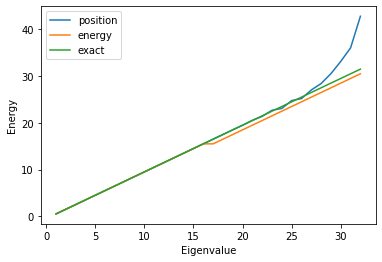

In [59]:
#QHO constructed from position and energy basis, respectively
H_pos = np.array(np.matrix(X_pos(32))**2/2 + np.matrix(P_pos(32))**2/2)
H_en = np.array(np.matrix(X_en(32))**2/2 + np.matrix(P_en(32))**2/2)

#eigenvalues and eigenvectors, respectively
e_pos,v_pos = np.linalg.eig(H_pos)
e_en,v_en = np.linalg.eig(H_en)


def exactE(N):
    E = []
    for i in range(0,N+1):
        E.append(i+1/2)
    return E

import matplotlib.pyplot as plt

x_plot = np.arange(1,33,1)

plt.plot(x_plot, np.sort(e_pos), label = "position")
plt.plot(x_plot, np.sort(e_en), label = "energy")
plt.plot(x_plot, exactE(31), label = "exact")
plt.xlabel("Eigenvalue")
plt.ylabel("Energy")
plt.legend()
plt.show()

## References:
1. Miceli, R., & McGuigan, M. (2018, August). Quantum computation and visualization of hamiltonians using discrete quantum mechanics and ibm qiskit. In 2018 New York Scientific Data Summit (NYSDS) (pp. 1-6). IEEE.
